In [60]:
import pandas as pd
data = pd.read_csv("/home/caro/Documents/curso_geopython/Final-exercise/data/2315676.txt",delim_whitespace=True, 
                   na_values=[-9999], skiprows = [1],low_memory=False)

In [61]:
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0
...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0


In [62]:
## item 2

In [63]:
nulls = data["TAVG"].isna()
data["TAVG2"]=(data["TMAX"]+data["TMIN"])/2
for i, row in data.iterrows():
    if nulls[i]==False:
        #print(i)
        #print(nulls[i])
        data.at[i,"TAVG2"]=data.at[i,"TAVG"]

In [64]:
## item 3

In [65]:
def fahr_to_celsius(temp_fahrenheit):
    return (temp_fahrenheit - 32)/1.8

In [66]:
data["TAVG2_C"]=round(data["TAVG2"].apply(fahr_to_celsius),1)

In [67]:
data["TMAX_C"]=round(data["TMAX"].apply(fahr_to_celsius),1)

In [68]:
data["TMIN_C"]=round(data["TMIN"].apply(fahr_to_celsius),1)

In [69]:
## item 4

In [70]:
data["YEAR"] = data["DATE"].astype(str).str.slice(start=0,stop=4)

In [71]:
data["MO"] = data["DATE"].astype(str).str.slice(start=4,stop=6)

In [72]:
for i, row in data.iterrows():
    if data.at[i,"MO"]=='12' or data.at[i,"MO"]=='01' or data.at[i,"MO"]== '02':
        data.at[i,"SEAS"]='WI'
    elif data.at[i,"MO"]=='03' or data.at[i,"MO"]=='04' or data.at[i,"MO"]== '05':
        data.at[i,"SEAS"]='SP'
    elif data.at[i,"MO"]=='06' or data.at[i,"MO"]=='07' or data.at[i,"MO"]== '08':
        data.at[i,"SEAS"]='SU'
    elif data.at[i,"MO"]=='09' or data.at[i,"MO"]=='10' or data.at[i,"MO"]== '11':
        data.at[i,"SEAS"]='AU'

In [73]:
grouped = data.groupby(['YEAR', 'SEAS'])['TAVG2_C'].mean()

In [74]:
print(grouped)

YEAR  SEAS
1908  AU      -1.857955
      SP      -2.350575
      SU      11.427778
      WI     -12.325287
1909  AU      -0.156098
                ...    
2019  WI     -11.395556
2020  AU       7.716216
      SP      -0.827174
      SU      14.437363
      WI      -9.195000
Name: TAVG2_C, Length: 452, dtype: float64


In [75]:
grouped.to_csv('/home/caro/Documents/curso_geopython/Final-exercise/grouped.csv')

In [76]:
df = pd.read_csv('/home/caro/Documents/curso_geopython/Final-exercise/grouped.csv')

In [77]:
data["YEAR"]=data["YEAR"].astype(int)
data.dtypes
interval = data.loc[(data["YEAR"]>=1951)&(data["YEAR"]<=1980)]
seasonal_data_5180 = interval.groupby("SEAS")["TAVG2_C"].mean().to_frame(name='ref_temp')

In [78]:
seasonal_data_5180

,ref_temp
SEAS,
AU,-0.814731
SP,-2.338202
SU,12.400217
WI,-13.553102


In [79]:
df

,YEAR,SEAS,TAVG2_C
0,1908,AU,-1.857955
1,1908,SP,-2.350575
2,1908,SU,11.427778
3,1908,WI,-12.325287
4,1909,AU,-0.156098
...,...,...,...
447,2019,WI,-11.395556
448,2020,AU,7.716216
449,2020,SP,-0.827174
450,2020,SU,14.437363


In [80]:
final = df.merge(seasonal_data_5180,left_on='SEAS',right_on='SEAS')

In [81]:
final

,YEAR,SEAS,TAVG2_C,ref_temp
0,1908,AU,-1.857955,-0.814731
1,1909,AU,-0.156098,-0.814731
2,1910,AU,-1.745714,-0.814731
3,1911,AU,-1.280247,-0.814731
4,1912,AU,-2.072619,-0.814731
...,...,...,...,...
447,2016,WI,-11.193407,-13.553102
448,2017,WI,-10.113333,-13.553102
449,2018,WI,-11.557778,-13.553102
450,2019,WI,-11.395556,-13.553102


In [82]:
final["diff"]=final["TAVG2_C"]-final["ref_temp"]
final

,YEAR,SEAS,TAVG2_C,ref_temp,diff
0,1908,AU,-1.857955,-0.814731,-1.043224
1,1909,AU,-0.156098,-0.814731,0.658633
2,1910,AU,-1.745714,-0.814731,-0.930984
3,1911,AU,-1.280247,-0.814731,-0.465516
4,1912,AU,-2.072619,-0.814731,-1.257888
...,...,...,...,...,...
447,2016,WI,-11.193407,-13.553102,2.359695
448,2017,WI,-10.113333,-13.553102,3.439769
449,2018,WI,-11.557778,-13.553102,1.995324
450,2019,WI,-11.395556,-13.553102,2.157546


In [83]:
import matplotlib.pyplot as plt

In [98]:
winter=final[final["SEAS"]=="WI"]#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#how-do-i-filter-specific-rows-from-a-dataframe
summer=final[final["SEAS"]=="SU"]
spring=final[final["SEAS"]=="SP"]
autumn=final[final["SEAS"]=="AU"]

In [95]:
#We can see that as a result we have now a list containing two nested lists where the first one 
#contains the axis for column 1 and 2 on row 1 and the second list contains the axis for columns 1 and 2 for row 2.
#
#We can parse these axes into their own variables so it is easier to work with them.

Text(0, 0.5, 'Delta temperature [°C]')

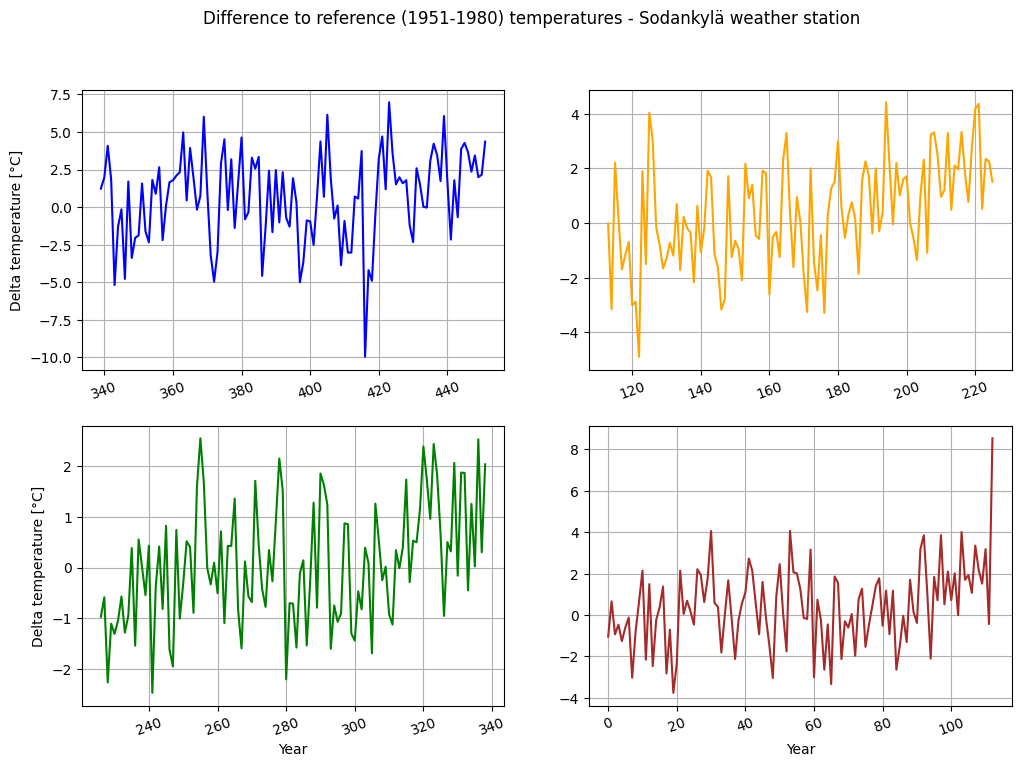

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

ax11 = axes[0][0]
ax12 = axes[0][1]
ax21 = axes[1][0]
ax22 = axes[1][1]

winter["diff"].plot(ax=ax11, c="blue", lw=1.5, grid=True)#, ylim=[min_temp, max_temp])
spring["diff"].plot(ax=ax12, c="orange", lw=1.5, grid=True)#, ylim=[min_temp, max_temp])
summer["diff"].plot(ax=ax21, c="green", lw=1.5, grid=True)#, ylim=[min_temp, max_temp])
autumn["diff"].plot(ax=ax22, c="brown", lw=1.5, grid=True)#, ylim=[min_temp, max_temp])

# Set figure title
fig.suptitle("Difference to reference (1951-1980) temperatures - Sodankylä weather station")

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel("Year")
ax22.set_xlabel("Year")
ax11.set_ylabel("Delta temperature [°C]")
ax21.set_ylabel("Delta temperature [°C]")

# Display plot
#fig